# Analysis of univariate random variables

### About dataset
This [dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download) contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

### Task
1. Choose subsample with main variables for your further analysis. Then for each of
them:

2. You need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function (or probability law in case of discrete RV).

3. You need to make an estimation of order statistics and represent them as “box with whiskers” plot.

4. Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

5. Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

6. Validate your estimated parameters using QQ biplots.

7. Estimate correctness of fitted distributions using at least 2 statistical tests.

In [ ]:
!python3 -m pip install seaborn

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

In [5]:
path_to_file = 'kc_house_data.csv'
source_df = pd.read_csv(path_to_file, engine='python')

source_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Text(0, 0.5, 'Price')

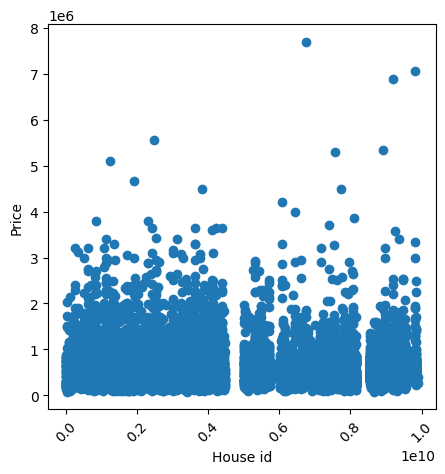

In [48]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(source_df['id'],source_df['price'])
plt.xticks(rotation=45)
plt.xlabel(u'House id')
plt.ylabel(u'Price')


### 3. Estimation of order statistics

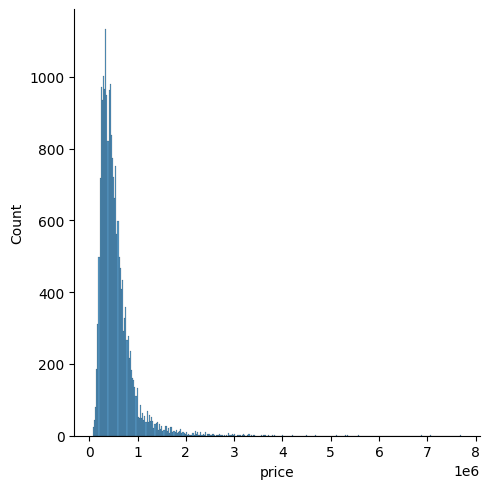

In [42]:
# sns.distplot(source_df['price'], kde=False)
sns.displot(source_df['price'], kde=False)

<AxesSubplot:xlabel='price'>

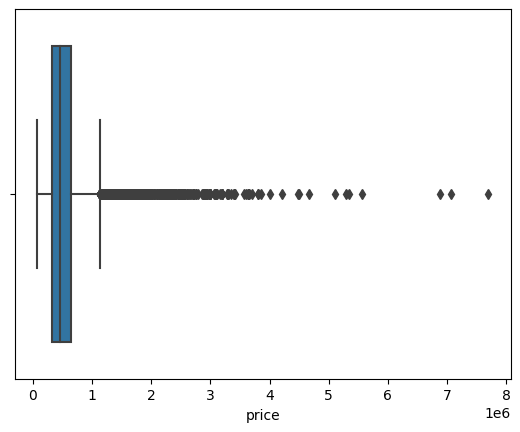

In [46]:
sns.boxplot(x=source_df["price"])

### Calculate average value

In [13]:
target_col = source_df['price']

mean = target_col.mean()
var = target_col.var()
std = target_col.std()
median = target_col.median()

# Calculate a truncated mean, truncated by 10% of the highest and lowest values
trimmed_mean = scipy.stats.trim_mean(target_col, proportiontocut=0.1)

#median absolute deviation
def mad(df):
    # parameter for lognormal distribution
    sigma = 1.2
    k = scipy.stats.lognorm.ppf(3/4., s=sigma)
    median = df.median()
    
    return k * np.median(np.fabs(df - median))


# Calculation of the MAD-characteristic (Median Absolute Deviation)
mad_value = mad(target_col)

print(f'Average Price:\n\taverage = {int(mean)},\n\tvariance = {int(var)},\n\tstandard deviation = {int(std)},'
      f'\n\tmedian = {int(median)},\n\ttruncated mean {int(trimmed_mean)},\n\tMAD = {int(mad_value)}')

Average Price:
	average = 540088,
	variance = 134782378397,
	standard deviation = 367127,
	median = 450000,
	truncated mean 481704,
	MAD = 336979


### Plotting a histogram and kernel density estimate

/var/folders/dn/p1_3j9fs78g4wn8r0hcrqks40000gn/T/ipykernel_48773/101010270.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_col, kde=False, norm_hist=True, label=f'Average price in dollars')


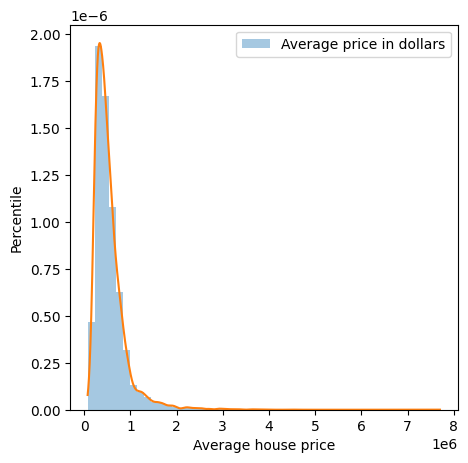

In [51]:
plt.figure(figsize=(5, 5))

target_col = source_df['price']

kernel = scipy.stats.gaussian_kde(target_col)

min, max = target_col.min(), target_col.max()
x = np.linspace(min, max, len(source_df))
kde_values = kernel(x)

sns.distplot(target_col, kde=False, norm_hist=True, label=f'Average price in dollars')
plt.plot(x, kde_values)

plt.ylabel('Percentile')
plt.xlabel('Average house price')

plt.legend()
plt.show()

## Part 2

In [21]:
source_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# Definition of all zipcodes that are present in the dataframe
all_zipcodes = source_df['zipcode'].unique()
print(f'All zipcodes:\n{all_zipcodes}')

All zipcodes:
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


In [24]:
# We form 2 samples: filter the source dataframe depending on the selected zipcode
zipcode_first, zipcode_second = 98178, 98125 

df_first = source_df.loc[source_df['zipcode'] == zipcode_first]
df_second = source_df.loc[source_df['zipcode'] == zipcode_second]

print(f'Number of houses with zipcode {zipcode_first}: {len(df_first)}')
print(f'Number of houses with zipcode {zipcode_second}: {len(df_second)}')

Number of houses with zipcode 98178: 262
Number of houses with zipcode 98125: 410


In [27]:
df_first.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
117,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
126,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712
273,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619
281,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775


### Plotting a histogram and kernel density estimate

/var/folders/dn/p1_3j9fs78g4wn8r0hcrqks40000gn/T/ipykernel_48773/196936327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_first['price'], kde=True, norm_hist=True, label=f'Zipcode {zipcode_first}')
/var/folders/dn/p1_3j9fs78g4wn8r0hcrqks40000gn/T/ipykernel_48773/196936327.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

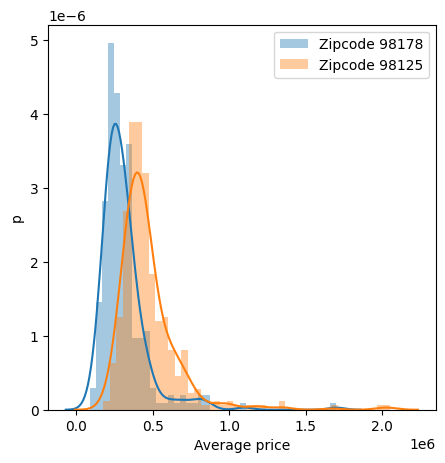

In [54]:
plt.figure(figsize=(5, 5))

sns.distplot(df_first['price'], kde=True, norm_hist=True, label=f'Zipcode {zipcode_first}')
sns.distplot(df_second['price'], kde=True, norm_hist=True, label=f'Zipcode {zipcode_second}')

plt.ylabel('p')
plt.xlabel('Average price')
plt.legend()
plt.show()

### Calculating confidence intervals for 25%, 50% and 75% quantiles

In [32]:
from math import sqrt

def conf_intervals(data, qn):
    # 95% quantile of Gaussian distribution
    norm_q95 = scipy.stats.norm.ppf(0.95)
    kernel = scipy.stats.gaussian_kde(data)

    p25 = len(data[data < qn[5]]) / len(data)
    sigma25 = \
        (sqrt((p25 * (1 - p25)) / len(data))) / kernel(qn[5])
    p50 = len(data[data < qn[10]]) / len(data)
    sigma50 = \
        (sqrt((p50 * (1 - p50)) / len(data))) / kernel(qn[10])
    p75 = len(data[data < qn[15]]) / len(data)
    sigma75 = \
        (sqrt((p75 * (1 - p75)) / len(data))) / kernel(qn[15])

    conf_q25 = norm_q95 * sigma25
    conf_q50 = norm_q95 * sigma50
    conf_q75 = norm_q95 * sigma75

    return [conf_q25, conf_q50, conf_q75]

# calculate quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_first['price'], percs)
qn_second = np.percentile(df_second['price'], percs)

conf_first = conf_intervals(df_first['price'], qn_first)
conf_second = conf_intervals(df_second['price'], qn_first)

print(f'25%, 50%, 75% - confidence intervals for zipcode {zipcode_first}:\n {conf_first}')
print(f'25%, 50%, 75% - confidence intervals for zipcode {zipcode_second}:\n {conf_second}')

25%, 50%, 75% - confidence intervals for zipcode 98178:
 [array([12197.44690298]), array([13490.07385407]), array([16926.59583433])]
25%, 50%, 75% - confidence intervals for zipcode 98125:
 [array([11495.81275268]), array([10191.89554462]), array([11422.57935912])]


In [33]:
conf_first_list = []
conf_second_list = []
for element1, element2 in zip(conf_first, conf_second):
    conf_first_list.append(element1[0])
    conf_second_list.append(element2[0])

In [35]:
conf_first_list

[12197.446902977512, 13490.073854074073, 16926.59583432898]

### Plotting a quantile biplot of two random variables

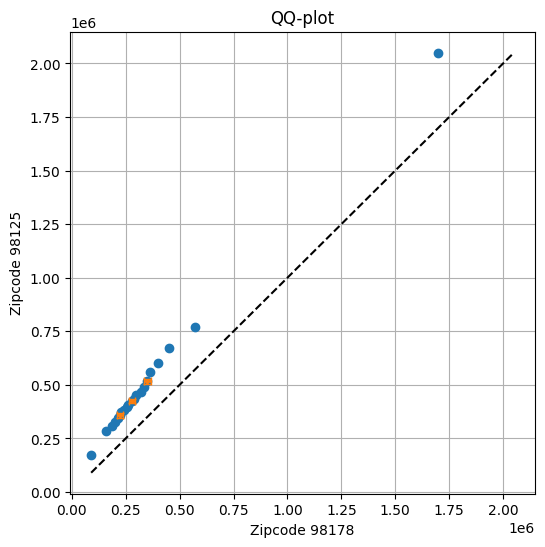

In [37]:
plt.figure(figsize=(6, 6))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlabel(f'Zipcode {zipcode_first}')
plt.ylabel(f'Zipcode {zipcode_second}')

plt.grid(True)

# Добавление доверительных интервалов на график
plt.errorbar(
    # [25%, 50%, 75%]
    [qn_first[5], qn_first[10], qn_first[15]],
    [qn_second[5], qn_second[10], qn_second[15]],
    xerr=conf_first_list,
    yerr=conf_second_list,
    ls='none',
    capsize=3,
    elinewidth=2
)

plt.title('QQ-plot')
plt.show()

### 5. Estimatation of the parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [39]:
# Determination of the parameters of the lognormal distribution of the average transaction value for zipcode 98178 
x = np.linspace(np.min(df_first['price']), np.max(df_first['price']))

# The distribution parameters are determined using the fit function based on the maximum likelihood method
params = scipy.stats.lognorm.fit(df_first['price'])
pdf = scipy.stats.lognorm.pdf(x, *params)

# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = scipy.stats.kstest(df_first['price'], 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(df_first['price'])
print(ks)
print(chi2)

KstestResult(statistic=0.7957020849090645, pvalue=2.1920789997606905e-178)
Power_divergenceResult(statistic=21792865.74749443, pvalue=0.0)


### Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

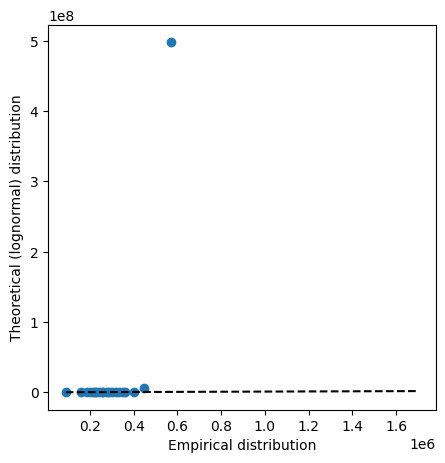

In [41]:
# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(df_first['price'], percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
# plt.xlim(0, 400)
# plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()